In [1]:
import pandas as pd

data = pd.read_csv("CE802_Ass_2019_Data.csv")
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,0,0,16,2.02,0.52,-2.35,-1.98,-0.70,85,6,-2.07,-0.07,1.08,15,-0.63,-3.49,-1.68,0.02,15.3,NaN,True
1,0,0,86,-0.90,2.75,0.14,0.83,-0.06,107,1,-0.86,0.17,1.06,-8,-1.21,0.34,0.36,0.61,10.1,NaN,True
2,1,1,165,0.73,1.05,0.10,2.57,-1.65,41,5,0.08,0.04,0.42,-6,-0.46,-0.62,1.67,2.60,11.0,1.55,False
3,1,1,191,-1.50,0.79,0.33,1.24,1.35,17,2,-0.85,1.74,1.74,15,0.47,0.63,0.08,0.19,6.3,0.95,False
4,1,1,13,0.25,-1.19,-0.90,2.67,0.22,12,8,0.68,-0.39,1.25,25,-0.09,-2.41,-0.53,-0.77,10.5,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,138,1.36,0.40,1.05,4.00,0.87,36,16,0.27,-0.93,0.70,23,0.23,-1.24,-0.65,1.26,20.9,2.87,True
496,0,0,102,2.06,0.09,0.84,3.63,1.22,57,-2,-0.32,-0.38,0.56,-6,-0.08,-1.29,-0.03,0.47,19.6,1.83,False
497,1,0,211,0.18,1.71,0.30,1.22,1.16,47,-49,-0.21,-0.77,0.78,7,-0.27,-0.45,-0.89,0.00,5.9,-1.03,False
498,1,0,94,-0.86,1.06,0.66,1.25,1.25,23,5,-0.10,0.68,0.11,-8,0.42,1.58,-0.79,-1.20,6.4,NaN,True


In [2]:
data = data.fillna(data.mean()) # Imputation Using Mean Values.

In [3]:
# Split dataset into features and target variable.
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

# **Mutual Information for Classification.**

*   Estimate mutual information for a discrete target variable.

**Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.**

**The function relies on nonparametric methods based on entropy estimation from $k$-nearest neighbors distances. It can also be used for univariate feature selection.**

[sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)

In [4]:
from sklearn.feature_selection import mutual_info_classif

# Determine the mutual information.
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.        , 0.02839734, 0.03319298, 0.0181435 , 0.0215173 ,
       0.00399069, 0.        , 0.00897609, 0.        , 0.00541011,
       0.        , 0.01417055, 0.        , 0.01456991, 0.        ,
       0.        , 0.01626364, 0.        , 0.        , 0.01891648])

In [5]:
# Sort the features based on Importance.
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

F3     0.033193
F2     0.028397
F5     0.021517
F20    0.018916
F4     0.018143
F17    0.016264
F14    0.014570
F12    0.014171
F8     0.008976
F10    0.005410
F6     0.003991
F19    0.000000
F9     0.000000
F11    0.000000
F7     0.000000
F13    0.000000
F15    0.000000
F16    0.000000
F18    0.000000
F1     0.000000
dtype: float64

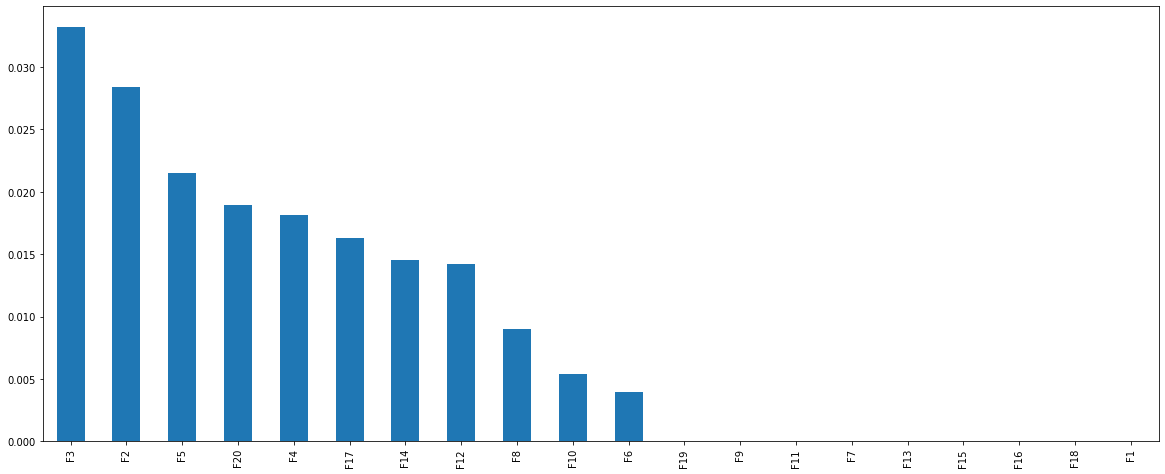

In [6]:
# Plot the ordered mutual_info values per feature.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [7]:
from sklearn.feature_selection import SelectKBest

# Select the top-best K=10 features.
sel_K_features = SelectKBest(mutual_info_classif, k=10).fit(X, y)
X.columns[sel_K_features.get_support()]

Index(['F1', 'F3', 'F4', 'F5', 'F6', 'F12', 'F15', 'F17', 'F19', 'F20'], dtype='object')

# **Mutual Information for Regression.**

*   Estimate mutual information for a continuous target variable.

**Mutual Information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.**

**The function relies on nonparametric methods based on entropy estimation from $k$-nearest neighbors distances. It can also be used for univariate feature selection.**

[sklearn.feature_selection.mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)


In [8]:
dataset = pd.read_csv("dataset_Facebook.csv", delimiter = ";")
dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [9]:
dataset.info()  # Dataset Summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [10]:
# Selecting only Numeric Features.
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(dataset.select_dtypes(include=numeric_lst).columns)

dataset = dataset[numerical_cols]
dataset.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [11]:
# Split dataset into features and target variable.
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

**Mutual Information for Regression.**

In [12]:
from sklearn.feature_selection import mutual_info_regression

# Determine the mutual information.
mutual_info = mutual_info_regression(X.fillna(0), y)
mutual_info

array([0.1312974 , 0.09686159, 0.11785008, 0.03552417, 0.        ,
       0.00411946, 0.44427311, 0.46172657, 0.37574985, 0.22369888,
       0.22391682, 0.30576199, 0.33334184, 0.39761614, 0.35715795,
       2.59927183, 0.91376862])

In [13]:
# Sort the features based on Importance.
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

like                                                                   2.599272
share                                                                  0.913769
Lifetime Post Total Impressions                                        0.461727
Lifetime Post Total Reach                                              0.444273
Lifetime People who have liked your Page and engaged with your post    0.397616
Lifetime Engaged Users                                                 0.375750
comment                                                                0.357158
Lifetime Post reach by people who like your Page                       0.333342
Lifetime Post Impressions by people who have liked your Page           0.305762
Lifetime Post Consumptions                                             0.223917
Lifetime Post Consumers                                                0.223699
Page total likes                                                       0.131297
Post Month                              

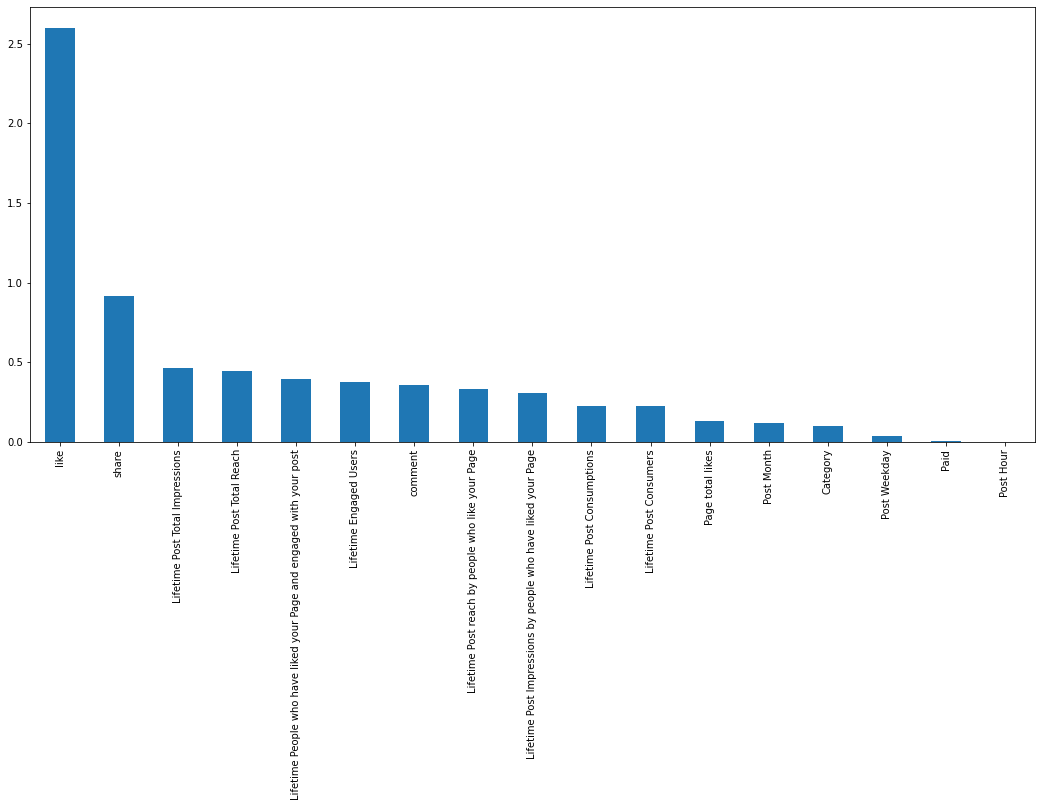

In [14]:
# Plot the ordered mutual_info values per feature.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(18, 8))

[sklearn.feature_selection.SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)

In [15]:
from sklearn.feature_selection import SelectPercentile

# Select the top 20 percentile.
sel_top_features = SelectPercentile(mutual_info_regression, percentile=20).fit(X.fillna(0), y)
X.columns[sel_top_features.get_support()]

Index(['Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'like',
       'share'],
      dtype='object')